# Meta-Heur√≠ticas : Trabalho Pr√°tico 1 

- Aym√™ Faustino dos Santos - 4704

O trabalho consiste em implementar duas meta-heur√≠ticas para minimizar duas fun√ß√µes objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [66]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Fun√ß√µes Objetivo 

### 1.1 Representa√ß√£o da Solu√ß√£o

Vamos utilizar um vetor para representar as vari√°veis de decis√£o. Na fun√ß√£o objetivo 1 ele ter√° tamanho dois pois temos duas variaveis de decis√£o po≈ïem na fun√ß√£o objetivo 2 temos quatro variaveis de decis√£o sendo assim ele ter√° tamanho quatro.

### 1.2 Fun√ß√£o Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [67]:
def f(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

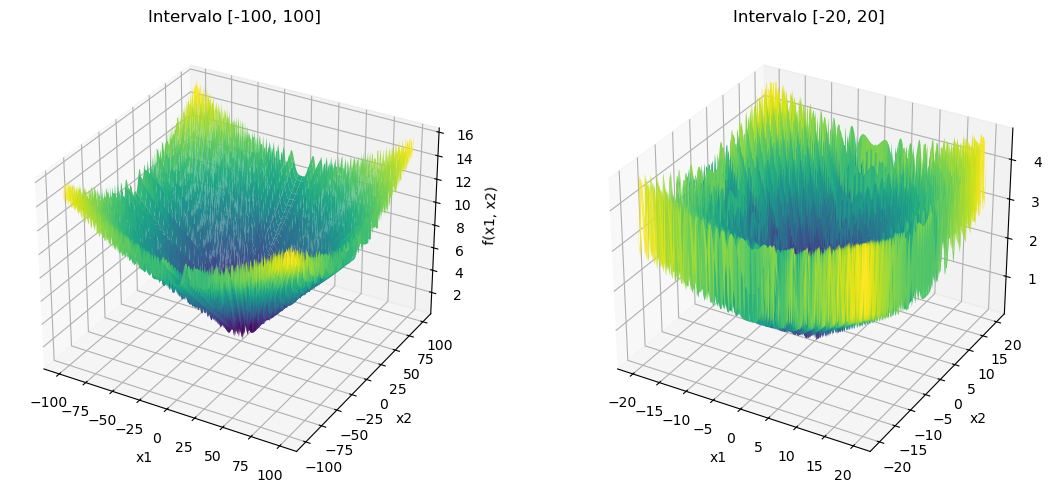

In [68]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(12, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[f([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo [-100, 100]', 'Intervalo [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Fun√ß√£o Objetivo 2

1.3.1 Intervalos

a)‚àí10 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 10

b)‚àí2 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 2

In [69]:
def f(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

## 2. Meta-Heuristicas

Para minimiziar as fun√ß√µes objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decis√µes precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) √© uma metaheur√≠stica baseada na explora√ß√£o sistem√°tica de diferentes vizinhan√ßas para encontrar a solu√ß√£o √≥tima de um problema. A principal motiva√ß√£o do VNS √© evitar ficar preso em √≥timos locais, expandindo a busca para outras regi√µes do espa√ßo de solu√ß√µes.

Ele se baseia na seguinte ideia:
- Se uma solu√ß√£o √© um √≥timo local em uma vizinhan√ßa, ela pode n√£o ser em outra.
- Alternar entre diferentes vizinhan√ßas ajuda a escapar de √≥timos locais e encontrar melhores solu√ß√µes.

VNS √© eficiente, simples e vers√°til, sendo utilizado em problemas de otimiza√ß√£o combinat√≥ria e cont√≠nua.

#### 2.1.1 Pseudoc√≥digo do VNS B√°sico

Entrada: solu√ß√£o inicial `x`, n√∫mero m√°ximo de vizinhan√ßas `k_max`, n√∫mero m√°ximo de itera√ß√µes

1. x_best ‚Üê x

2. Para t = 1 at√© max_iter fa√ßa:

    3. k ‚Üê 1

    4. Enquanto k ‚â§ k_max fa√ßa:

        5.   Gerar x' na k-√©sima vizinhan√ßa de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ‚Üê x''

        9.       k ‚Üê 1   // reinicia vizinhan√ßa

        10.  Sen√£o:

        11.      k ‚Üê k + 1
        
12. Retornar x_best



#### 2.1.2 Decis√µes importantes na implementa√ß√£o do VNS

üîπ Solu√ß√£o Inicial

üîπ Estrutura de Vizinhan√ßa

üîπ M√©todo de Perturba√ß√£o

üîπ Condi√ß√µes de Parada

üîπ Estrat√©gia de Busca Local

 üîπ Quantidade de vizinhan√ßas (k_max)



### 2.2 Simulated Annealing (SA)

#### 2.2.1. Conceito do Algoritmo

O **Simulated Annealing** √© inspirado no processo de recozimento em metalurgia:

1- **Temperatura alta** ‚Üí Aceita solu√ß√µes piores (explora√ß√£o).

2- **Temperatura baixa** ‚Üí Aceita apenas melhoras (exploitation).

3- **Resfriamento gradual** ‚Üí Reduz a temperatura ao longo do tempo.

#### 2.2.2 Passos do algor√≠tmo

```python
# 1. INICIALIZA√á√ÉO
x_atual ‚Üê SOLU√á√ÉO_ALEAT√ìRIA(limites, dimensao)  # Gera solu√ß√£o inicial
f_atual ‚Üê funcao_objetivo(x_atual)
T ‚Üê 1000                                        # Temperatura inicial
alpha ‚Üê 0.95                                    # Taxa de resfriamento
historico_melhores ‚Üê [f_atual]                  # Armazena hist√≥rico

# 2. LOOP TERMAL PRINCIPAL
ENQUANTO T > 0.01 FA√áA:
    PARA i DE 1 AT√â 100 FA√áA:                   # Itera√ß√µes por temperatura
        
        # 2.1 GERA√á√ÉO DE VIZINHO
        x_vizinho ‚Üê PERTURBA(x_atual, limites)
        f_vizinho ‚Üê funcao_objetivo(x_vizinho)
        delta ‚Üê f_vizinho - f_atual
        
        # 2.2 CRIT√âRIO DE ACEITA√á√ÉO
        SE delta < 0 OU rand() < exp(-delta/T) ENT√ÉO:
            x_atual ‚Üê x_vizinho                 # Atualiza solu√ß√£o
            f_atual ‚Üê f_vizinho
            
            # 2.3 ATUALIZA MELHOR SOLU√á√ÉO
            SE f_atual < MIN(historico_melhores):
                melhor_x ‚Üê x_atual
                melhor_f ‚Üê f_atual
    
    # 2.4 RESFRIAMENTO
    T ‚Üê T * alpha                               # Reduz temperatura
    historico_melhores.APPEND(f_atual)          # Registra progresso

RETORNE melhor_x, melhor_f                      # Solu√ß√£o final

#### 2.2.3 Implementa√ß√£o em Python

##### 2.2.3.1 Classe do Simulated Annealing

In [70]:
# Fun√ß√£o objetivo
def funcao_objetivo(x):
    soma_quadrados = sum(xi**2 for xi in x)
    termo1 = 1 - math.cos(2 * math.pi * math.sqrt(soma_quadrados))
    termo2 = 0.1 * math.sqrt(soma_quadrados)
    return termo1 + termo2

In [71]:
class SimulatedAnnealing:
    def __init__(self, dimensao, limites, funcao_obj):
        self.d = dimensao
        self.limite_inf = limites[0]
        self.limite_sup = limites[1]
        self.funcao_obj = funcao_obj
    
    def solucao_inicial(self):
        """Gera uma solu√ß√£o aleat√≥ria dentro dos limites."""
        return np.random.uniform(self.limite_inf, self.limite_sup, self.d)
    
    def gerar_vizinho(self, x_atual, passo_max):
        """Perturba a solu√ß√£o atual para gerar um vizinho."""
        perturbacao = np.random.uniform(-passo_max, passo_max, self.d)
        x_vizinho = x_atual + perturbacao
        return np.clip(x_vizinho, self.limite_inf, self.limite_sup)
    
    def executar(self, n_execucoes=30, T_inicial=1000, T_final=0.01, alpha=0.95, iteracoes_T=200, passo_max=None):
        """Executa o SA e retorna estat√≠sticas."""
        if passo_max is None:
            passo_max = (self.limite_sup - self.limite_inf) * 0.1
        
        resultados = []
        melhores_x = []
        
        for _ in range(n_execucoes):
            x_atual = self.solucao_inicial()
            f_atual = self.funcao_obj(x_atual)
            T = T_inicial
            melhor_x = x_atual.copy()
            melhor_f = f_atual
            
            while T > T_final:
                for _ in range(iteracoes_T):
                    x_vizinho = self.gerar_vizinho(x_atual, passo_max)
                    f_vizinho = self.funcao_obj(x_vizinho)
                    
                    delta_f = f_vizinho - f_atual
                    
                    if delta_f < 0 or np.random.random() < math.exp(-delta_f / T):
                        x_atual, f_atual = x_vizinho, f_vizinho
                        
                        if f_atual < melhor_f:
                            melhor_f = f_atual
                            melhor_x = x_atual.copy()
                
                T *= alpha  # Resfriamento
            
            resultados.append(melhor_f)
            melhores_x.append(melhor_x)
        
        return {
            'resultados': np.array(resultados),
            'melhores_x': np.array(melhores_x),
            'media': np.mean(resultados),
            'minimo': np.min(resultados),
            'maximo': np.max(resultados),
            'desvio': np.std(resultados)
        }

#### 2.2.4 Execu√ß√£o para Todos os Problemas

##### 2.2.4.1 Configura√ß√£o dos Problemas

In [72]:
problemas = [
    {'nome': '1a) d=2 [-100,100]', 'd': 2, 'limites': (-100, 100)},
    {'nome': '1b) d=2 [-20,20]', 'd': 2, 'limites': (-20, 20)},
    {'nome': '2c) d=4 [-10,10]', 'd': 4, 'limites': (-10, 10)},
    {'nome': '2d) d=4 [-2,2]', 'd': 4, 'limites': (-2, 2)}
]

##### 2.2.4.2 Execu√ß√£o e An√°lise


 === 1a) d=2 [-100,100] ===
M√©dia: 0.096793
M√≠nimo: 0.060532
M√°ximo: 0.110579
Desvio padr√£o: 0.013118
Melhor x encontrado: [-0.05194637  0.01118499]


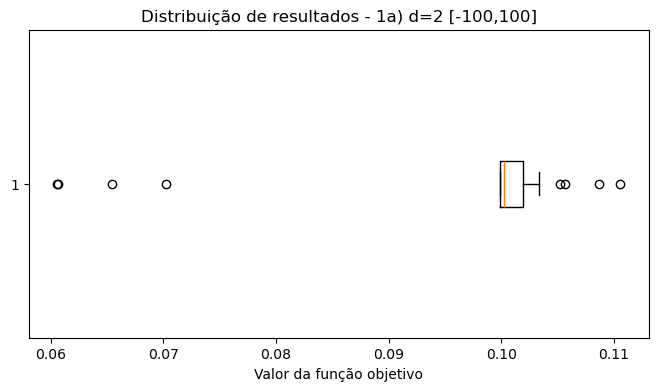


 === 1b) d=2 [-20,20] ===
M√©dia: 0.028030
M√≠nimo: 0.001585
M√°ximo: 0.099878
Desvio padr√£o: 0.028486
Melhor x encontrado: [-0.00673697  0.00075726]


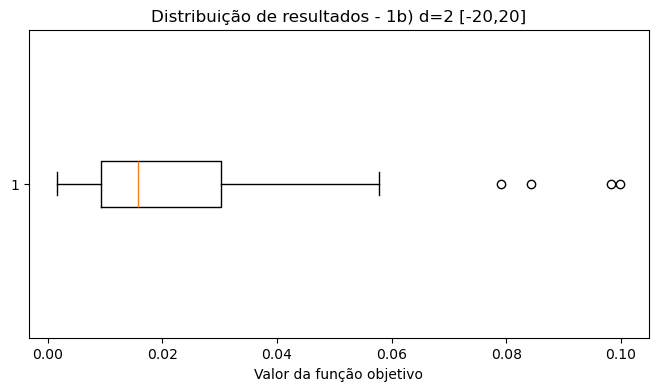


 === 2c) d=4 [-10,10] ===
M√©dia: 0.099893
M√≠nimo: 0.099873
M√°ximo: 0.100130
Desvio padr√£o: 0.000046
Melhor x encontrado: [-0.66868088  0.01741611  0.51959923 -0.52689749]


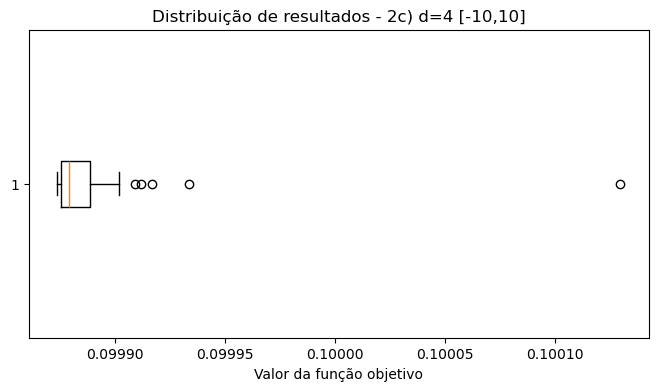


 === 2d) d=4 [-2,2] ===
M√©dia: 0.097189
M√≠nimo: 0.019291
M√°ximo: 0.099888
Desvio padr√£o: 0.014465
Melhor x encontrado: [0.00973983 0.01659072 0.01634597 0.01400162]


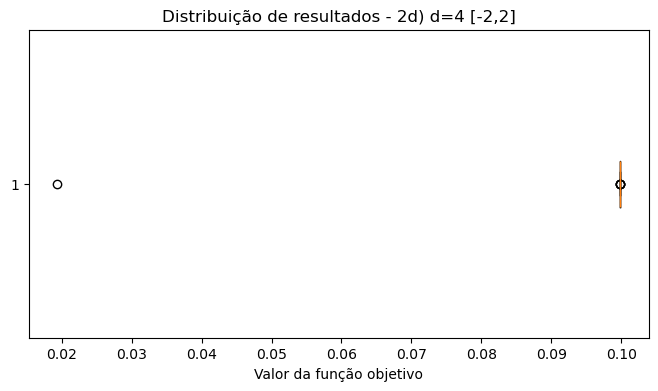

In [73]:
for problema in problemas:
    print(f"\n === {problema['nome']} ===")
    
    # Ajuste autom√°tico de par√¢metros
    intervalo = problema['limites'][1] - problema['limites'][0]
    passo_max = intervalo * 0.1  # Passo inicial = 10% do intervalo
    
    # Configura√ß√µes do SA
    sa = SimulatedAnnealing(
        dimensao=problema['d'],
        limites=problema['limites'],
        funcao_obj=funcao_objetivo
    )
    
    # Execu√ß√£o
    resultados = sa.executar(
        T_inicial=1000,
        passo_max=passo_max
    )
    
    # Exibi√ß√£o dos resultados
    print(f"M√©dia: {resultados['media']:.6f}")
    print(f"M√≠nimo: {resultados['minimo']:.6f}")
    print(f"M√°ximo: {resultados['maximo']:.6f}")
    print(f"Desvio padr√£o: {resultados['desvio']:.6f}")
    print(f"Melhor x encontrado: {resultados['melhores_x'][np.argmin(resultados['resultados'])]}")
    
    # Boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(resultados['resultados'], vert=False)
    plt.title(f"Distribui√ß√£o de resultados - {problema['nome']}")
    plt.xlabel("Valor da fun√ß√£o objetivo")
    plt.show()